### Librerías

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from collections import Counter
from math import sqrt
import seaborn as sns
%matplotlib inline

## Metodología

### Recolectar

### Lectura de la base de datos

In [2]:
df = pd.read_csv('./heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


#### Subsampling

In [3]:
df_sub = df.sample(frac = 0.05)
df_sub = df_sub.sort_index()
df_sub

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No
81,No,29.53,Yes,No,No,18.0,0.0,No,Male,50-54,White,No,Yes,Fair,6.0,Yes,No,No
86,No,34.75,Yes,No,No,0.0,0.0,No,Female,45-49,White,No,No,Very good,7.0,No,No,Yes
157,No,22.14,No,No,No,14.0,0.0,No,Male,80 or older,Black,No,Yes,Good,7.0,Yes,No,No
172,No,26.89,Yes,No,No,5.0,3.0,Yes,Female,70-74,White,Yes,Yes,Good,6.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319660,No,19.37,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,Yes,Excellent,8.0,No,No,No
319661,No,18.37,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,Yes,Excellent,7.0,Yes,No,No
319686,No,25.38,Yes,No,No,5.0,0.0,No,Male,50-54,Hispanic,Yes,Yes,Fair,7.0,No,No,No
319693,No,44.29,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,Yes,Very good,7.0,No,No,No


### Preparar

#### Convertir las caracteristicas linguisticas a valores categoricos

In [4]:
df_sub['Diabetic'].unique()

array(['No', 'Yes', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [5]:
df_sub['AgeCategory'].unique()

array(['65-69', '50-54', '45-49', '80 or older', '70-74', '60-64',
       '75-79', '55-59', '35-39', '18-24', '40-44', '25-29', '30-34'],
      dtype=object)

Convertir las caracteristicas linguisticas a valores categoricos

In [6]:
datos = df_sub.copy()
datos =  datos[datos.columns].replace({'Male':0, 'Female':1})
datos =  datos[datos.columns].replace({'Yes':1, 'No':0, 'No, borderline diabetes':2,'Yes (during pregnancy)':3 })
datos =  datos[datos.columns].replace({'American Indian/Alaskan Native':1, 'Asian':2, 'Black':3,'Hispanic':4, 'Other':5, 'White':6 })
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
datos['AgeCategory'] = datos['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
datos['AgeCategory'] = datos['AgeCategory'].astype('float')
datos =  datos[datos.columns].replace({'Excellent':4, 'Fair':1, 'Good':2,'Poor':0, 'Very good':3})

In [7]:
datos

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
9,0,40.69,0,0,0,0.0,0.0,1,0,67.0,6,0,1,2,10.0,0,0,0
81,0,29.53,1,0,0,18.0,0.0,0,0,52.0,6,0,1,1,6.0,1,0,0
86,0,34.75,1,0,0,0.0,0.0,0,1,47.0,6,0,0,3,7.0,0,0,1
157,0,22.14,0,0,0,14.0,0.0,0,0,80.0,3,0,1,2,7.0,1,0,0
172,0,26.89,1,0,0,5.0,3.0,1,1,72.0,6,1,1,2,6.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319660,0,19.37,0,0,0,0.0,0.0,0,1,27.0,4,0,1,4,8.0,0,0,0
319661,0,18.37,0,0,0,0.0,0.0,0,1,27.0,4,0,1,4,7.0,1,0,0
319686,0,25.38,1,0,0,5.0,0.0,0,0,52.0,4,1,1,1,7.0,0,0,0
319693,0,44.29,0,0,0,0.0,0.0,0,1,27.0,4,0,1,3,7.0,0,0,0


#### Comprobar la no existencia de datos faltantes

In [8]:
def valores_faltantes(dataset):
    missing_values_count = dataset.isnull().sum()
    total_missing = missing_values_count.sum() 
    #Porcentaje de datos faltantes
    total_missing_porcent = total_missing/(np.product(dataset.shape))*100
    print('Porcentaje total de valores faltantes:',total_missing_porcent,'%')
    print('')
    print('Porcentaje de valores faltantes de cada atributo:')
    for col in dataset.columns:
        VP_missing = np.mean(dataset[col].isnull())
        print('{} - {}%'.format(col,round(VP_missing*100)))  

In [9]:
valores_faltantes(datos)

Porcentaje total de valores faltantes: 0.0 %

Porcentaje de valores faltantes de cada atributo:
HeartDisease - 0%
BMI - 0%
Smoking - 0%
AlcoholDrinking - 0%
Stroke - 0%
PhysicalHealth - 0%
MentalHealth - 0%
DiffWalking - 0%
Sex - 0%
AgeCategory - 0%
Race - 0%
Diabetic - 0%
PhysicalActivity - 0%
GenHealth - 0%
SleepTime - 0%
Asthma - 0%
KidneyDisease - 0%
SkinCancer - 0%


#### Identificación de outliers

<AxesSubplot:>

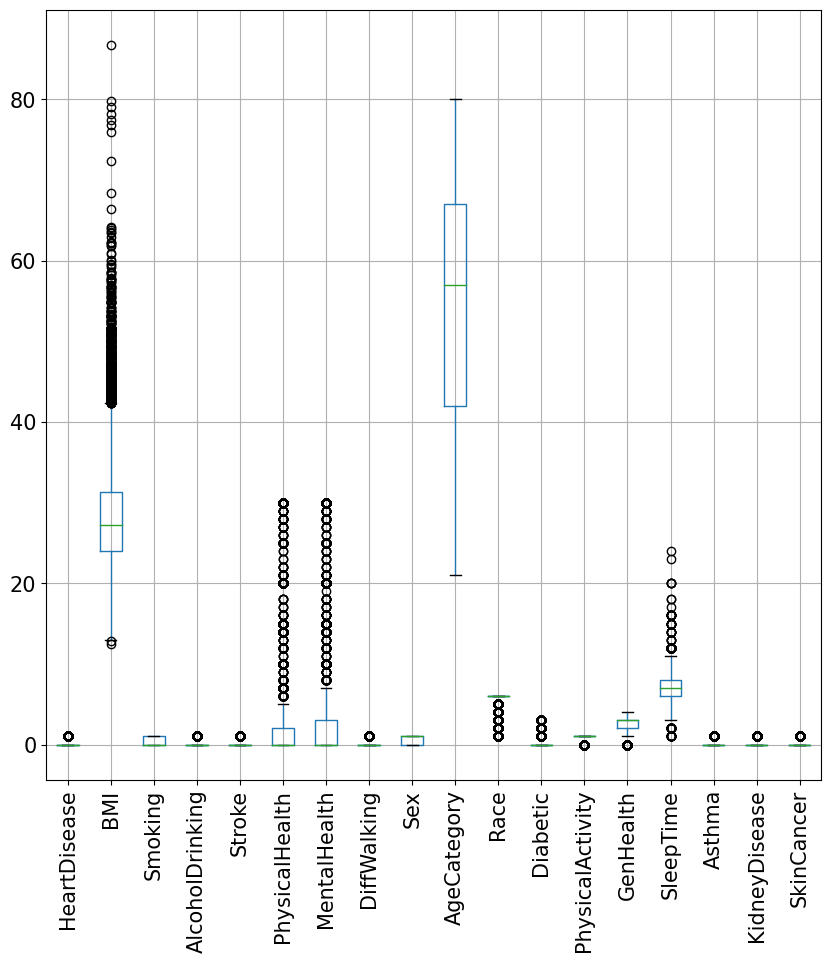

In [10]:
datos.boxplot(rot=90, fontsize=15,figsize = (10,10))

#### Normalización de los datos

In [11]:
def norm_min_max(datos):
    lim_sup = []
    lim_inf = []
    rangoDatos =[]
    maxNorm = 1
    minNorm = 0
    rango = maxNorm - minNorm
    for i in range (0,datos.columns.size):
        lim_sup.append(datos.iloc[:,i].max())
        lim_inf.append(datos.iloc[:,i].min())
        rangoDatos.append(lim_sup[i] - lim_inf[i])
    nombres = datos.columns.values.tolist()
    datosNorm = pd.DataFrame(columns = nombres)

    for j in range(len(datos.columns)):
        varNorm = []
        var = datos.iloc[:,j]
        for i in range(len(datos)):
            D = var[i] - lim_inf[j]
            DPct = D/rangoDatos[j]
            dNorm = rango*DPct
            varNorm.append(minNorm+dNorm)
        datosNorm.iloc[:,j] = varNorm
    datos = datosNorm
    return datos

In [12]:
d =pd.DataFrame(datos)
d = d.reset_index()
d = d.drop(['index'],axis=1) #Eliminando el atributo de decisión 
d

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,40.69,0,0,0,0.0,0.0,1,0,67.0,6,0,1,2,10.0,0,0,0
1,0,29.53,1,0,0,18.0,0.0,0,0,52.0,6,0,1,1,6.0,1,0,0
2,0,34.75,1,0,0,0.0,0.0,0,1,47.0,6,0,0,3,7.0,0,0,1
3,0,22.14,0,0,0,14.0,0.0,0,0,80.0,3,0,1,2,7.0,1,0,0
4,0,26.89,1,0,0,5.0,3.0,1,1,72.0,6,1,1,2,6.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,0,19.37,0,0,0,0.0,0.0,0,1,27.0,4,0,1,4,8.0,0,0,0
15986,0,18.37,0,0,0,0.0,0.0,0,1,27.0,4,0,1,4,7.0,1,0,0
15987,0,25.38,1,0,0,5.0,0.0,0,0,52.0,4,1,1,1,7.0,0,0,0
15988,0,44.29,0,0,0,0.0,0.0,0,1,27.0,4,0,1,3,7.0,0,0,0


In [13]:
d_S = d.loc[:,['BMI','PhysicalHealth','MentalHealth','AgeCategory','Race','Diabetic','GenHealth','SleepTime']]
CD_S = d.loc[:,['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']]
datos_norm = norm_min_max(d_S)
datos_norm = pd.concat([datos_norm, CD_S], axis=1)
datos_norm

C:\Users\gaby9\AppData\Local\Temp\ipykernel_23068\1809094097.py:23: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  datosNorm.iloc[:,j] = varNorm


,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0.379575,0.000000,0.0,0.779661,1.0,0.000000,0.50,0.391304,0,0,0,0,1,0,1,0,0,0
1,0.229413,0.600000,0.0,0.525424,1.0,0.000000,0.25,0.217391,0,1,0,0,0,0,1,1,0,0
2,0.299650,0.000000,0.0,0.440678,1.0,0.000000,0.75,0.260870,0,1,0,0,0,1,0,0,0,1
3,0.129978,0.466667,0.0,1.000000,0.4,0.000000,0.50,0.260870,0,0,0,0,0,0,1,1,0,0
4,0.193891,0.166667,0.1,0.864407,1.0,0.333333,0.50,0.217391,0,1,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,0.092707,0.000000,0.0,0.101695,0.6,0.000000,1.00,0.304348,0,0,0,0,0,1,1,0,0,0
15986,0.079252,0.000000,0.0,0.101695,0.6,0.000000,1.00,0.260870,0,0,0,0,0,1,1,1,0,0
15987,0.173574,0.166667,0.0,0.525424,0.6,0.333333,0.25,0.260870,0,1,0,0,0,0,1,0,0,0
15988,0.428014,0.000000,0.0,0.101695,0.6,0.000000,0.75,0.260870,0,0,0,0,0,1,1,0,0,0


### Analizar

#### Distribución de la información por atributo

In [14]:
datos_norm.describe()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
count,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000
mean,0.212711,0.111192,0.129948,0.565699,0.881776,0.064103,0.649484,0.265818,0.087054,0.418824,0.070607,0.038399,0.140650,0.529018,0.773421,0.132020,0.036710,0.090682
std,0.086287,0.263592,0.265650,0.300609,0.240929,0.163688,0.259476,0.062091,0.281924,0.493382,0.256175,0.192164,0.347671,0.499173,0.418631,0.338523,0.188056,0.287165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.154467,0.000000,0.000000,0.355932,1.000000,0.000000,0.500000,0.217391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.198870,0.000000,0.000000,0.610169,1.000000,0.000000,0.750000,0.260870,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.253498,0.066667,0.100000,0.779661,1.000000,0.000000,0.750000,0.304348,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


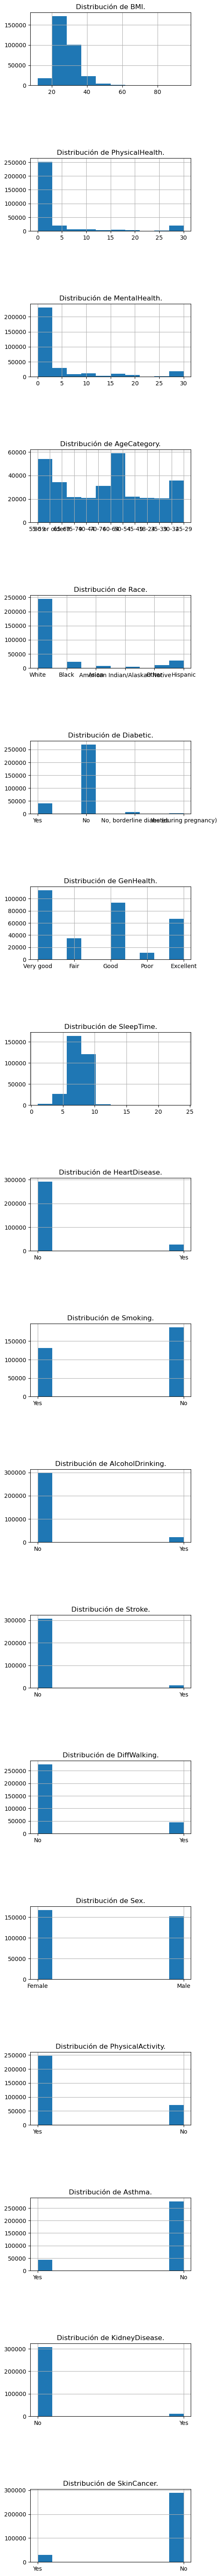

In [15]:
columnas = datos_norm.columns.values
fig, axs = plt.subplots(df.shape[1], 1, figsize = (5,80))
plt.subplots_adjust(hspace = 1)
for i, c in enumerate(columnas):
    dist_datos = df[c]
    axs[i].set_title(f'Distribución de {c}.')
    axs[i].hist(dist_datos)
    axs[i].grid(True)

#### Reducción de dimensionalidad (PCA)

In [16]:
def matriz_cov(data):
    atributos = data.columns 
    n = len(atributos)
    m = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            X = data[atributos[i]]
            Y = data[atributos[j]]
            m[i][j] = (((X-X.mean())*(Y-Y.mean())).sum())/(len(X)-1)
    return m

In [17]:
def PCA(datos,col_decision):
    datos1 = datos.drop([col_decision],axis=1) #Eliminando el atributo de decisión 
    #Ajustar los datos restando la media a cada atributo
    datos_A = pd.DataFrame(columns=datos1.columns,index=range(len(datos1)))
    for i in datos_A.columns:
        datos_A[i] = datos1[i] - datos1[i].mean()    
    #datos_A  
    matrix = matriz_cov(datos_A)  
    #sns.heatmap(matrix)  
    L,V =  np.linalg.eig(matrix)  
    #Obtener el porcentaje de covarianza de cada uno de los atributos
    total = L.sum()
    p = (L/total)*100
    pca =[]
    names =[]
    columnas1 = datos_A.columns.values
    for index, row in enumerate(p):
        print(columnas1[index] + ':',row)  
        names.append(columnas1[index])
    return names,p        

In [18]:
col_decision = 'HeartDisease'
n,p = PCA(datos_norm,col_decision)

BMI: 19.057745659800883
PhysicalHealth: 17.49276352438293
MentalHealth: 12.562019354495312
AgeCategory: 8.234980999280838
Race: 8.16443871086199
Diabetic: 6.264771002789714
GenHealth: 0.24606907531022748
SleepTime: 0.43506727354989827
Smoking: 4.885104766456476
AlcoholDrinking: 4.227105324884088
Stroke: 1.6013000126875103
DiffWalking: 3.785399158766292
Sex: 3.481640798314787
PhysicalActivity: 2.862736283114465
Asthma: 2.360640734951453
KidneyDisease: 2.137242983564264
SkinCancer: 2.200974336788871


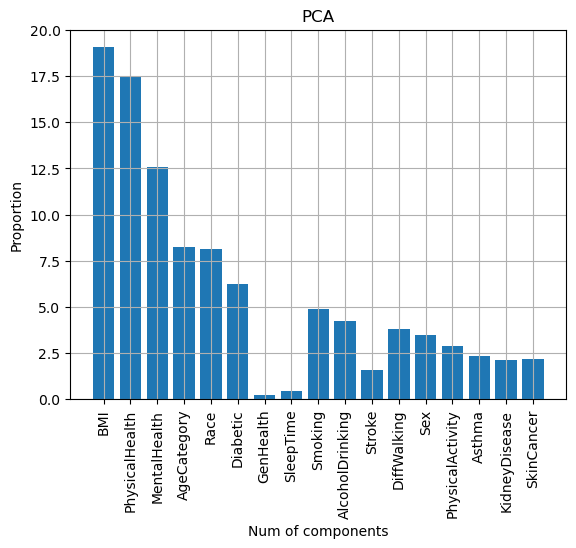

In [19]:
index = np.arange(len(p))
plt.bar(n, p)
plt.title('PCA')
plt.xlabel('Num of components')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')
plt.grid(True)

In [20]:
datos_PCA = datos_norm.loc[:,['HeartDisease','BMI','PhysicalHealth','MentalHealth','AgeCategory','Race','Diabetic','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity']]
datos_PCA

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity
0,0,0.379575,0.000000,0.0,0.779661,1.0,0.000000,0,0,0,1,1
1,0,0.229413,0.600000,0.0,0.525424,1.0,0.000000,1,0,0,0,1
2,0,0.299650,0.000000,0.0,0.440678,1.0,0.000000,1,0,0,0,0
3,0,0.129978,0.466667,0.0,1.000000,0.4,0.000000,0,0,0,0,1
4,0,0.193891,0.166667,0.1,0.864407,1.0,0.333333,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15985,0,0.092707,0.000000,0.0,0.101695,0.6,0.000000,0,0,0,0,1
15986,0,0.079252,0.000000,0.0,0.101695,0.6,0.000000,0,0,0,0,1
15987,0,0.173574,0.166667,0.0,0.525424,0.6,0.333333,1,0,0,0,1
15988,0,0.428014,0.000000,0.0,0.101695,0.6,0.000000,0,0,0,0,1


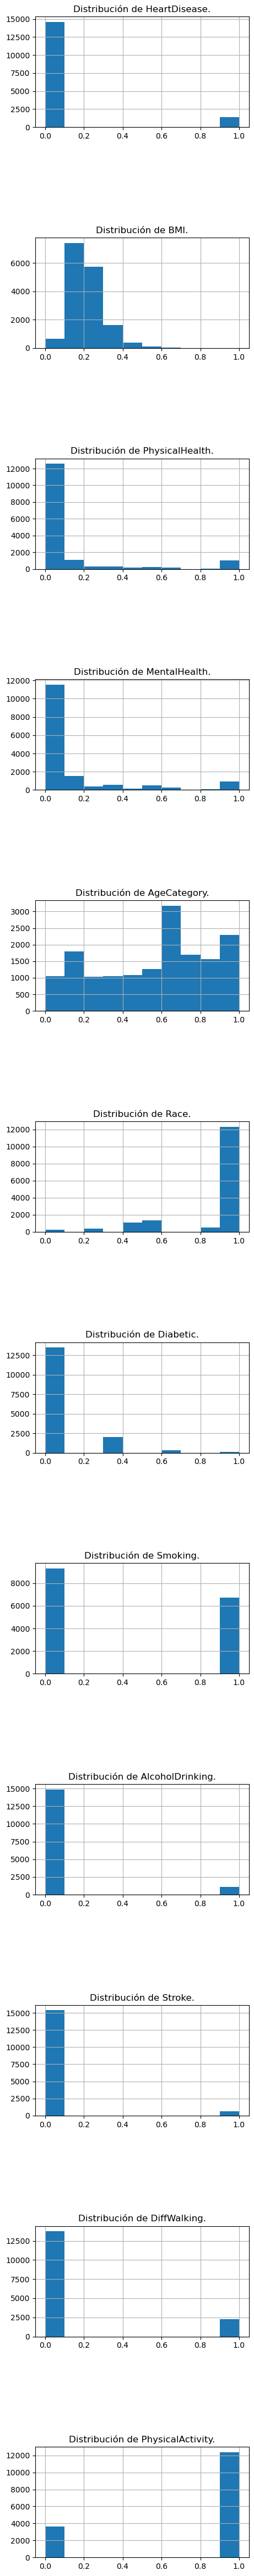

In [21]:
data_ = datos_PCA
columnas = data_.columns.values
fig, axs = plt.subplots(data_.shape[1], 1, figsize = (5,60))
plt.subplots_adjust(hspace = 1)
for i, c in enumerate(columnas):
    dist_datos = data_[c]
    axs[i].set_title(f'Distribución de {c}.')
    axs[i].hist(dist_datos)
    axs[i].grid(True)

###  Datos de entrenamiento y prueba  

#### Matriz de confusión y métricas de evaluación

In [22]:
#Función que obtiene las métricas del algoritmo para su validación
def metricas(claseP,true_train):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    #Determinar los TP,TN,FP y FN para la matriz de confusión del entrenamiento 
    for i in range(len(claseP)):
        if (true_train[i] == claseP[i]) and true_train[i] == 1:
            TP += 1
        elif (true_train[i] == claseP[i]) and true_train[i] == 0:
            TN += 1
        elif (true_train[i] != claseP[i]) and true_train[i] == 0:
            FP += 1
        else:
            FN += 1
            
    accuracy = ((TP+TN)/(TP+TN+FP+FN))
   
    if TP + FP != 0:
        precision = TP/(TP+FP)
    else:
        precision = 0
    if TP + FN != 0:
        sensitividad = TP/(TP+FN)
    else:
        sensitividad = 0
    if precision != 0 and sensitividad != 0:
        f1 = (2*TP)/(2*TP+FP+FN)
    else:
        f1 = 0
    return [accuracy, precision, sensitividad, f1]

In [23]:
# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0 
	for i in range(len(row1)-1):										#for k in range(23)
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [24]:
def get_neighbors(k,distances_ord):
    neighbors = list()
    indices = list()
    for i in range(k):
        neighbors.append(distances_ord[i][0])
        indices.append(distances_ord[i][1])
    return neighbors,indices

In [25]:
def most_common(output_values):
    return max(set(output_values), key=output_values.count)

In [26]:
#entrenamiento del modelo
def predict_classification(x,y, k):
    predict = []
    for j in range(0,len(x)):
        # Inicializacion de las distancias.
        distances = []
        x = np.array(x)
        for i ,example in enumerate(x):
            distance = euclidean_distance(example,x[j])# Calculate the Euclidean distance between two vectors
            distances.append((distance, i))
        distances.pop(j)
        distances_ord = sorted(distances)
        neighbors,indices = get_neighbors(k,distances_ord)
        output_values = y.iloc[indices]
        output_values = output_values.to_numpy().tolist()
        predict.append(most_common(output_values))
    return predict

In [27]:
def entrenamiento(x_,y_,n):
    error_rate = []
    mejor_k = []

    for k in tqdm(range(2,n+1)):
        pred_i = predict_classification(x_train.values.tolist(),y_train,k) 
        mejor_k.append(k)
        error_rate.append(np.mean(pred_i != y_train))
    e = pd.DataFrame(error_rate)
    e_min = e.min()[0]
    idx_k = error_rate.index(e_min)
    best_k_value = mejor_k[idx_k]
    print(mejor_k)

    plt.figure(figsize=(10,6))
    plt.plot(mejor_k,error_rate,color='blue', linestyle='dashed', marker='o',
    markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    return best_k_value, mejor_k

In [28]:
def kfold(x,y,k,i):
    section = int(len(x)/k)
    x_test = x.iloc[i * section : (i+1) * section, :]
    x_train = x_.drop([i * section,((i+1) * section)-1 , 1],axis=0)

    y_test = y.iloc[i * section : (i+1) * section]
    y_train = y_.drop([i * section,((i+1) * section)-1 , 1],axis=0)

    return x_test, y_test, x_train, y_train

In [29]:
y_ = datos_PCA['HeartDisease']

In [30]:
x_ = datos_PCA

  0%|          | 0/5 [00:00<?, ?it/s]

Total de datos en x_train: 15987
Total de datos en x_test: 3198



100%|██████████| 4/4 [1:53:46<00:00, 1706.60s/it]


[2, 3, 4, 5]


 20%|██        | 1/5 [1:54:52<7:39:29, 6892.35s/it]

K en cuestión: 1
best_k_value: 3
Total de datos en x_train: 15987
Total de datos en x_test: 3198



100%|██████████| 4/4 [1:53:39<00:00, 1704.84s/it]


[2, 3, 4, 5]


 40%|████      | 2/5 [3:49:35<5:44:21, 6887.13s/it]

K en cuestión: 2
best_k_value: 3
Total de datos en x_train: 15987
Total de datos en x_test: 3198



100%|██████████| 4/4 [1:51:08<00:00, 1667.22s/it]


[2, 3, 4, 5]


 60%|██████    | 3/5 [5:41:49<3:47:13, 6816.86s/it]

K en cuestión: 3
best_k_value: 3
Total de datos en x_train: 15987
Total de datos en x_test: 3198



100%|██████████| 4/4 [1:54:43<00:00, 1720.81s/it]


[2, 3, 4, 5]


 80%|████████  | 4/5 [7:37:35<1:54:28, 6868.19s/it]

K en cuestión: 4
best_k_value: 3
Total de datos en x_train: 15987
Total de datos en x_test: 3198



100%|██████████| 4/4 [1:51:13<00:00, 1668.48s/it]


[2, 3, 4, 5]


100%|██████████| 5/5 [9:29:54<00:00, 6838.94s/it]  

K en cuestión: 5
best_k_value: 3


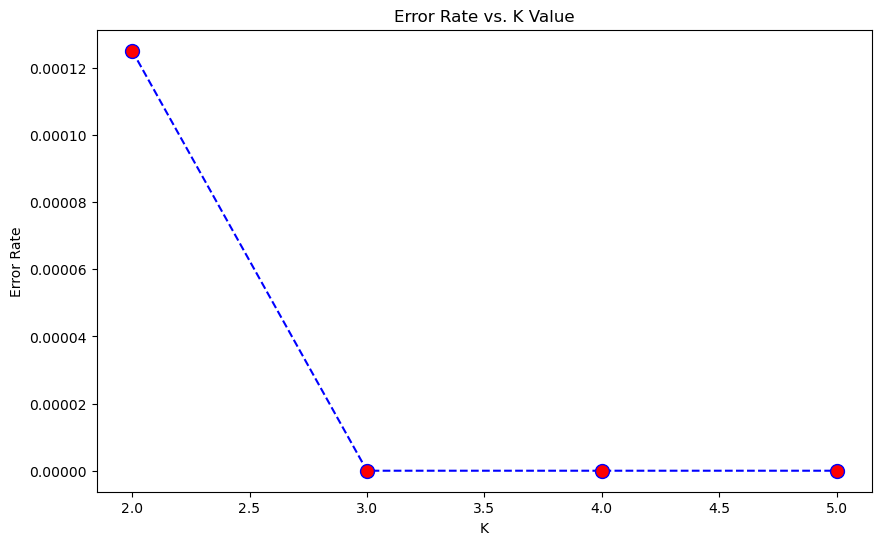

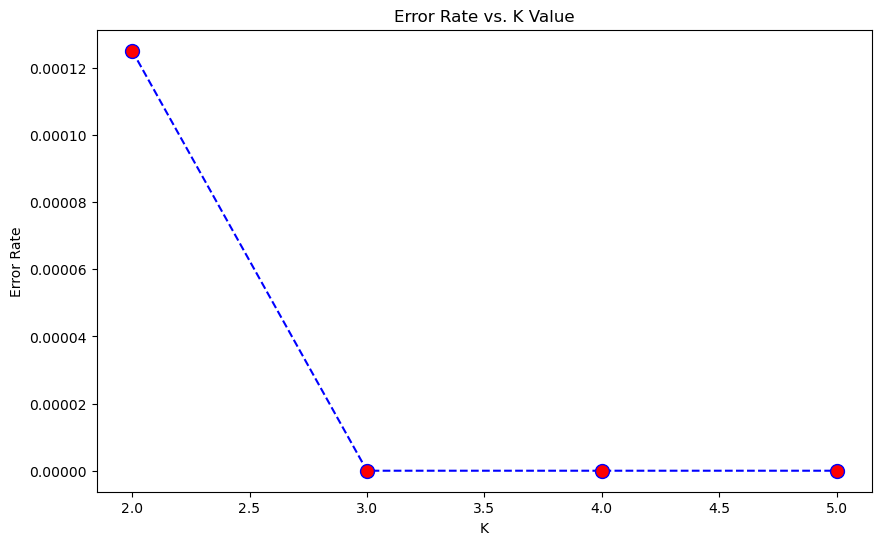

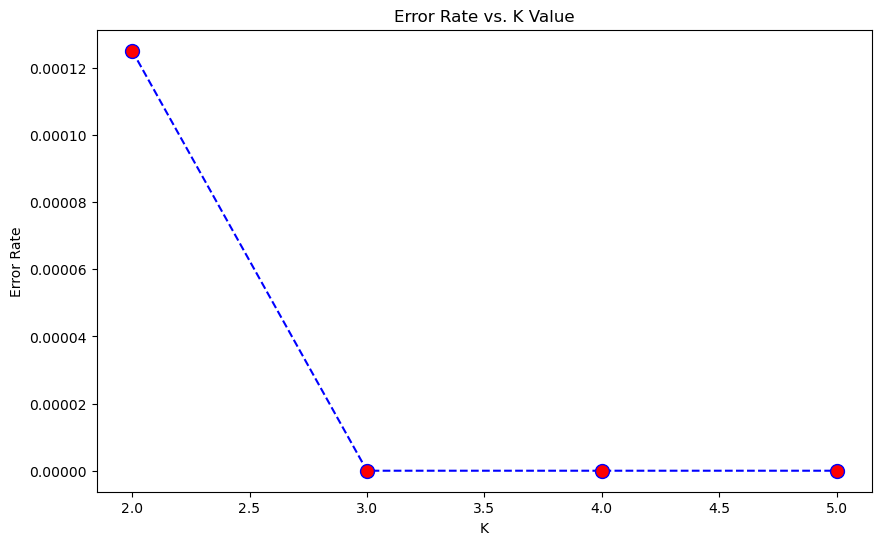

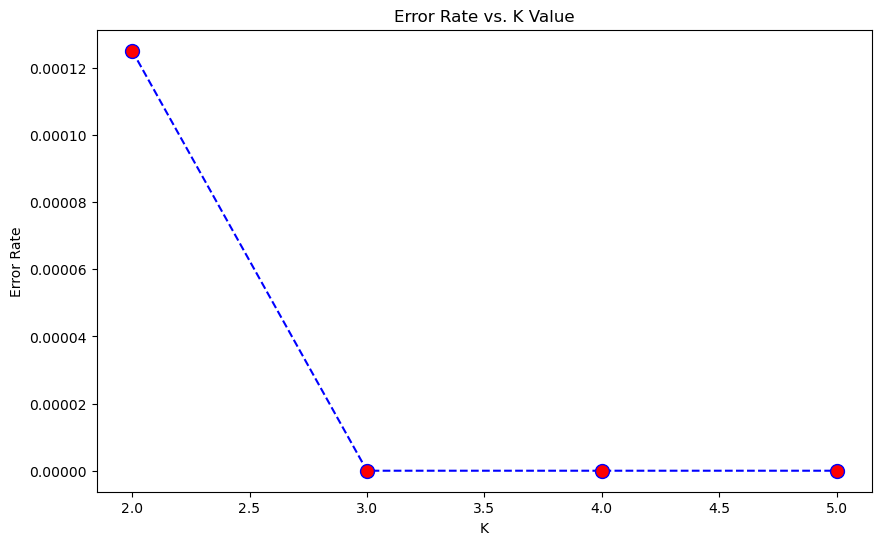

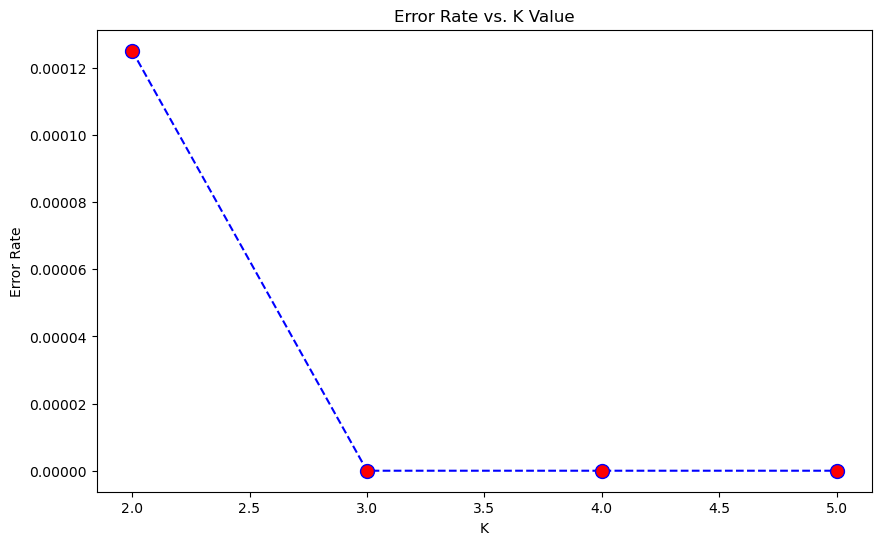

In [35]:
acc_kf_s_test = 0.0
acc_kf_test = 0.0
pre_kf_s_test = 0.0
pre_kf_test = 0.0
sens_kf_s_test = 0.0
sens_kf_test = 0.0
f1_kf_s_test = 0.0
f1_kf_test = 0.0

i = 0
k_ = 5 

for i in tqdm(range(k_)):
    x_test, y_test, x_train, y_train = kfold(x_, y_, k_, i)
    print('Total de datos en x_train:',len(x_train))
    print('Total de datos en x_test:',len(x_test))
    k_knn, k_list = entrenamiento(x_train, y_train,5)
    y_pred_test = predict_classification(x_test, y_test,k_knn)
    print('K en cuestión:',i+1)
    print('best_k_value:',k_knn)
    
    acc_kf_test, pre_kf_test, sens_kf_test, f1_kf_test = metricas(y_pred_test,np.array(y_test))
    acc_kf_s_test += acc_kf_test
    pre_kf_s_test += pre_kf_test
    sens_kf_s_test += sens_kf_test
    f1_kf_s_test += f1_kf_test

In [37]:
print('Exacitud kfold-cross:', acc_kf_s_test/k_)
print('Precisión kfold-cross:', pre_kf_s_test/k_)
print('Sensitividad kfold-cross:', sens_kf_s_test/k_)
print('F1 Score kfold-cross:', f1_kf_s_test/k_)

Exacitud kfold-cross: 0.9998749218261412
Precisión kfold-cross: 1.0
Sensitividad kfold-cross: 0.9984570648626194
F1 Score kfold-cross: 0.99922703731146


### k fold 10

  0%|          | 0/10 [00:00<?, ?it/s]

Total de datos en x_train: 15987
Total de datos en x_test: 1599



100%|██████████| 4/4 [1:51:43<00:00, 1675.82s/it]


[2, 3, 4, 5]
K en cuestión: 1
best_k_value: 3


 10%|█         | 1/10 [1:51:59<16:47:54, 6719.42s/it]

Total de datos en x_train: 15987
Total de datos en x_test: 1599



100%|██████████| 4/4 [1:51:03<00:00, 1665.99s/it]


[2, 3, 4, 5]
K en cuestión: 2
best_k_value: 3


 20%|██        | 2/10 [3:43:16<14:52:34, 6694.36s/it]

Total de datos en x_train: 15987
Total de datos en x_test: 1599



100%|██████████| 4/4 [1:51:11<00:00, 1667.83s/it]


[2, 3, 4, 5]
K en cuestión: 3
best_k_value: 3


 30%|███       | 3/10 [5:34:43<13:00:37, 6691.07s/it]

Total de datos en x_train: 15987
Total de datos en x_test: 1599



100%|██████████| 4/4 [2:21:30<00:00, 2122.54s/it]


[2, 3, 4, 5]
K en cuestión: 4
best_k_value: 3


 40%|████      | 4/10 [7:56:29<12:20:46, 7407.67s/it]

Total de datos en x_train: 15987
Total de datos en x_test: 1599



100%|██████████| 4/4 [2:29:39<00:00, 2244.95s/it]


[2, 3, 4, 5]
K en cuestión: 5
best_k_value: 3


 50%|█████     | 5/10 [10:26:25<11:05:01, 7980.24s/it]

Total de datos en x_train: 15987
Total de datos en x_test: 1599



100%|██████████| 4/4 [1:53:26<00:00, 1701.56s/it]


[2, 3, 4, 5]
K en cuestión: 6
best_k_value: 3


 60%|██████    | 6/10 [12:20:06<8:25:45, 7586.41s/it] 

Total de datos en x_train: 15987
Total de datos en x_test: 1599



100%|██████████| 4/4 [1:53:17<00:00, 1699.32s/it]


[2, 3, 4, 5]
K en cuestión: 7
best_k_value: 3


 70%|███████   | 7/10 [14:13:40<6:06:40, 7333.61s/it]

Total de datos en x_train: 15987
Total de datos en x_test: 1599



100%|██████████| 4/4 [1:53:35<00:00, 1703.92s/it]


[2, 3, 4, 5]
K en cuestión: 8
best_k_value: 3


 80%|████████  | 8/10 [16:07:31<3:59:07, 7173.59s/it]

Total de datos en x_train: 15987
Total de datos en x_test: 1599



100%|██████████| 4/4 [1:53:39<00:00, 1704.76s/it]


[2, 3, 4, 5]
K en cuestión: 9
best_k_value: 3


 90%|█████████ | 9/10 [18:01:25<1:57:47, 7067.62s/it]

Total de datos en x_train: 15987
Total de datos en x_test: 1599



100%|██████████| 4/4 [1:53:24<00:00, 1701.05s/it]


[2, 3, 4, 5]
K en cuestión: 10
best_k_value: 3


100%|██████████| 10/10 [19:55:05<00:00, 7170.58s/it] 


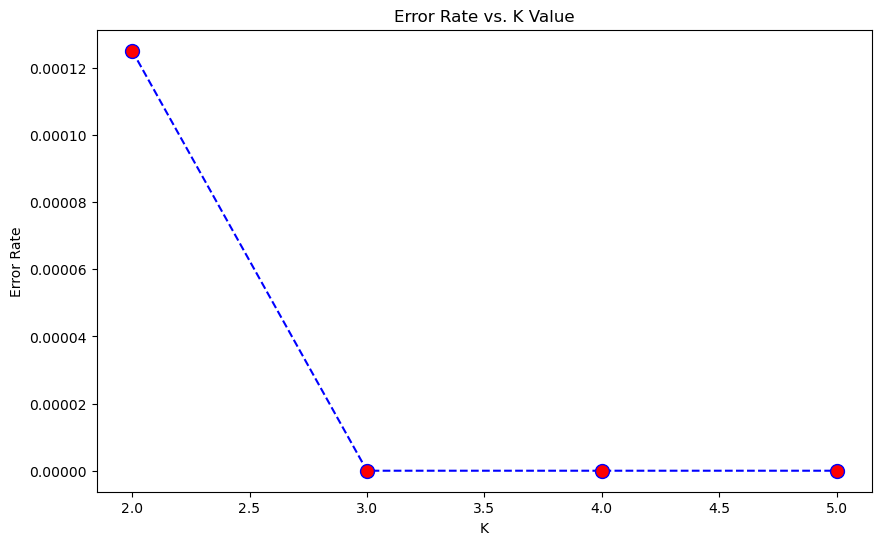

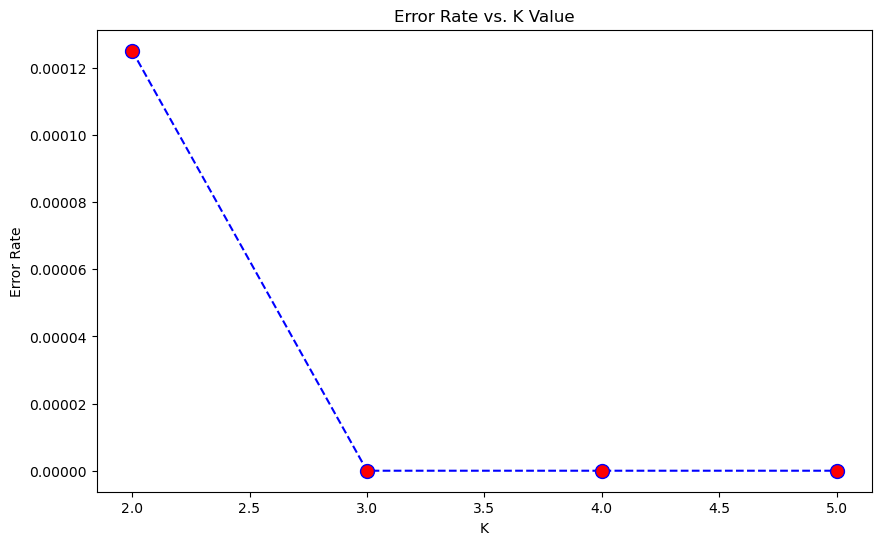

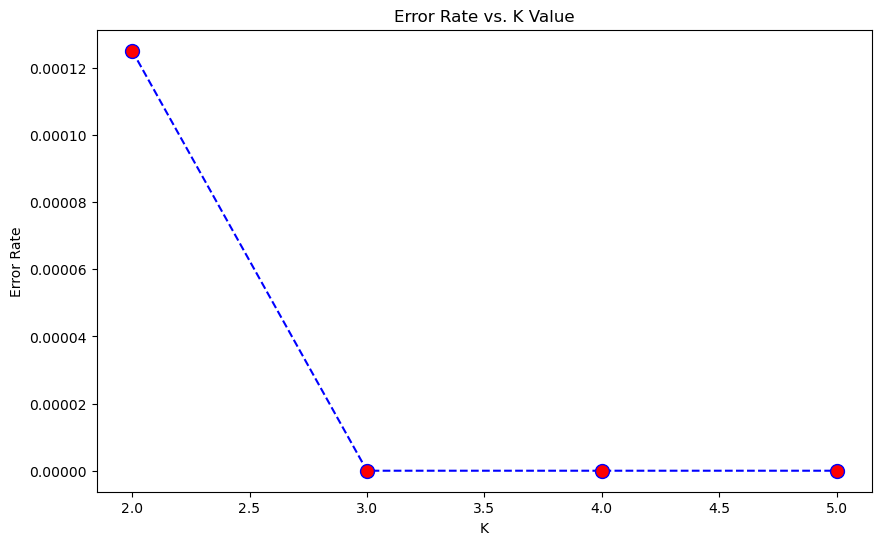

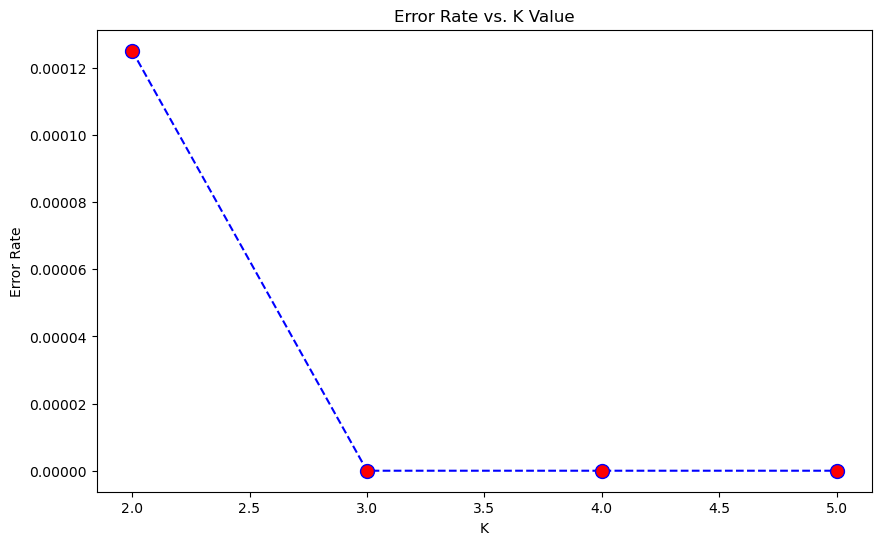

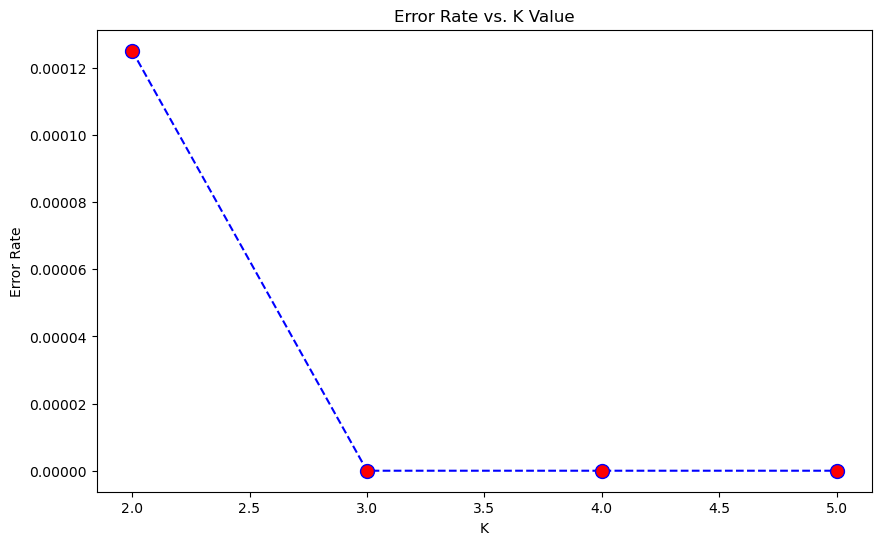

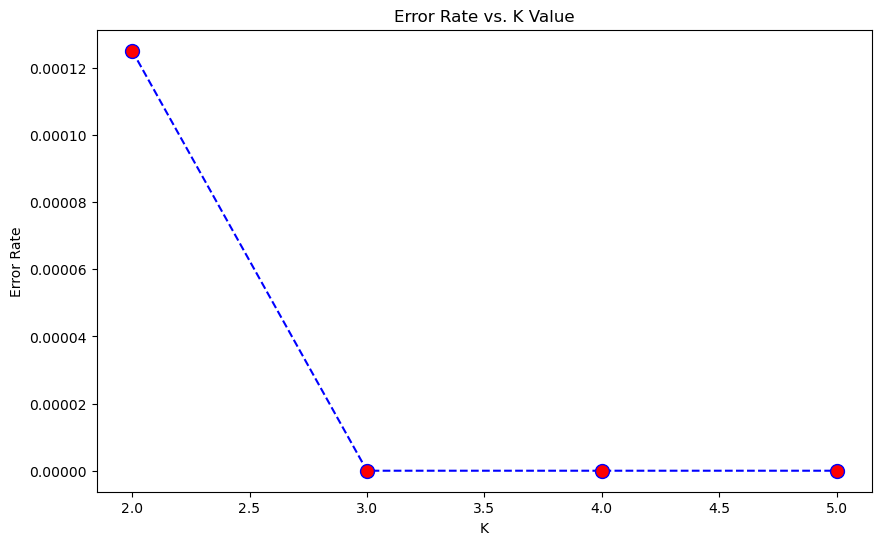

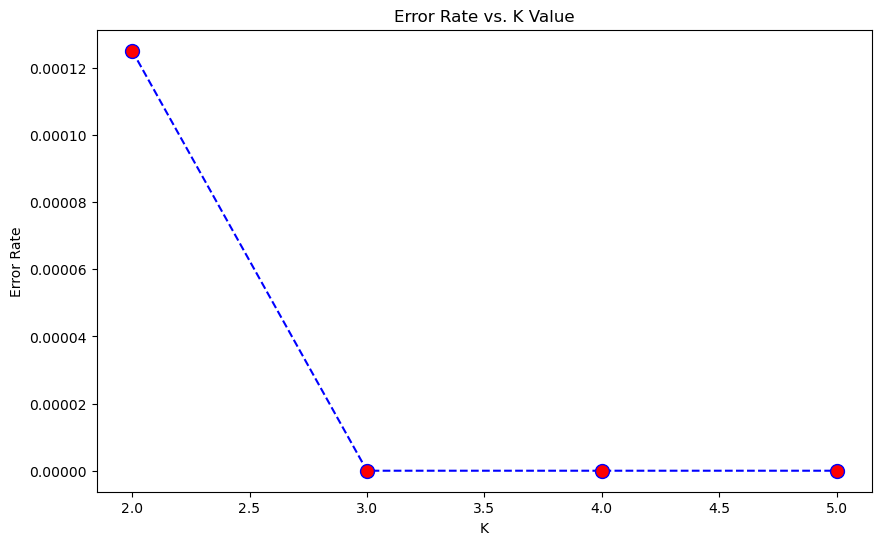

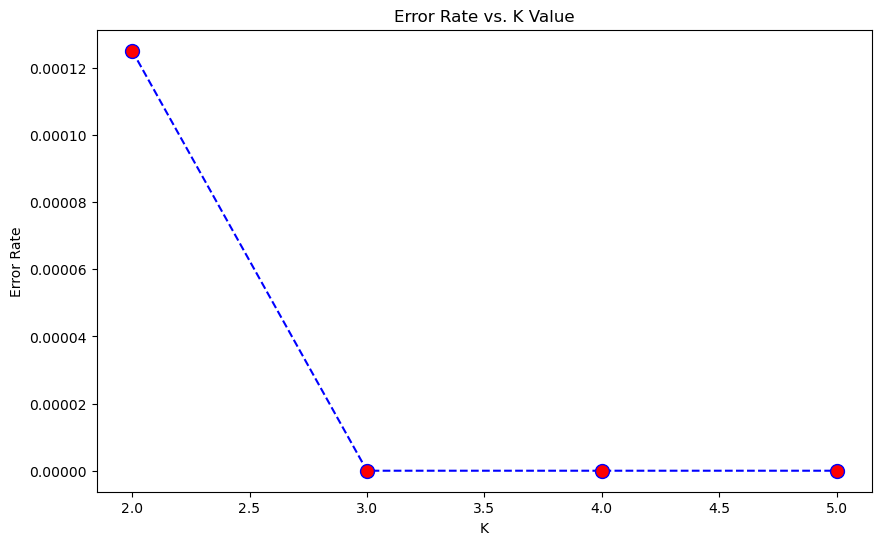

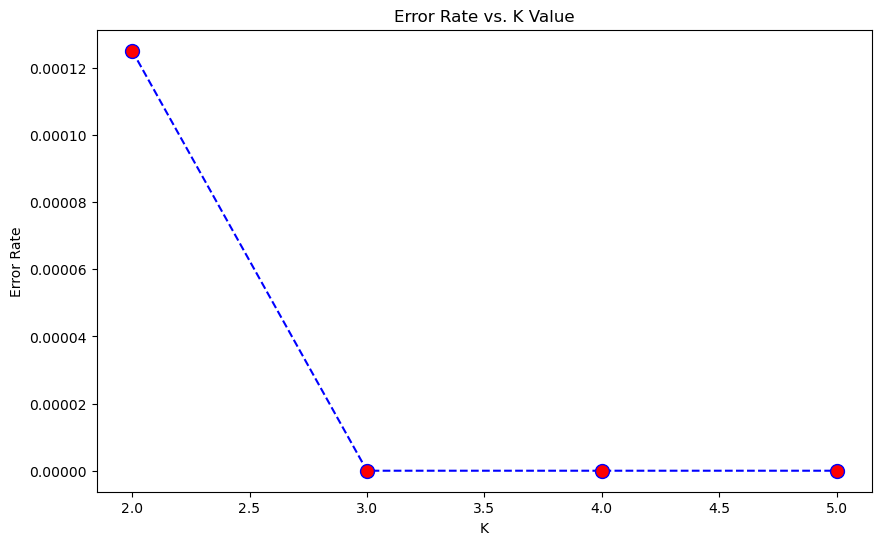

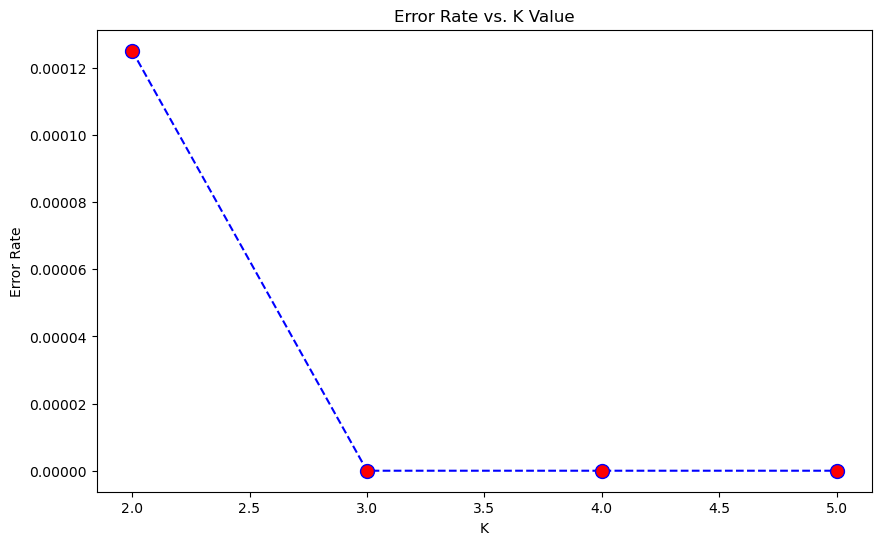

In [38]:
acc_kf_s_test = 0.0
acc_kf_test = 0.0
pre_kf_s_test = 0.0
pre_kf_test = 0.0
sens_kf_s_test = 0.0
sens_kf_test = 0.0
f1_kf_s_test = 0.0
f1_kf_test = 0.0

i = 0
k_ = 10 

for i in tqdm(range(k_)):
    x_test, y_test, x_train, y_train = kfold(x_, y_, k_, i)
    print('Total de datos en x_train:',len(x_train))
    print('Total de datos en x_test:',len(x_test))    
    k_knn, k_list = entrenamiento(x_train, y_train,5)
    print('K en cuestión:',i+1)
    print('best_k_value:',k_knn)
    y_pred_test = predict_classification(x_test, y_test,k_knn)
    
    acc_kf_test, pre_kf_test, sens_kf_test, f1_kf_test = metricas(y_pred_test,np.array(y_test))
    acc_kf_s_test += acc_kf_test
    pre_kf_s_test += pre_kf_test
    sens_kf_s_test += sens_kf_test
    f1_kf_s_test += f1_kf_test   

In [40]:
print('Exacitud kfold-cross:', acc_kf_s_test/k_)
print('Precisión kfold-cross:', pre_kf_s_test/k_)
print('Sensitividad kfold-cross:', sens_kf_s_test/k_)
print('F1 Score kfold-cross:', f1_kf_s_test/k_)

Exacitud kfold-cross: 0.9994996873045652
Precisión kfold-cross: 1.0
Sensitividad kfold-cross: 0.9938705229477727
F1 Score kfold-cross: 0.9969204289053188


### Validación en línea 60x20x20

In [31]:
def method_602020(x,y):
    train_x = x[0 : int(len(x)*0.6)]
    train_y = y[0 : int(len(y)*0.6)]
    val_x = x[int(len(x)*0.6) : int(len(x)*0.8)]
    val_y = y[int(len(y)*0.6) : int(len(y)*0.8)]
    test_x = x[int(len(x)*0.8) : ]
    test_y = y[int(len(y)*0.8) : ]
    return train_x, train_y, val_x, val_y, test_x, test_y

In [32]:
x_train, y_train, x_val, y_val, x_test, y_test = method_602020(x_,y_)

In [33]:
print('Total de datos en x_train:',len(x_train))
print('Total de datos en x_val:',len(x_val))
print('Total de datos en x_test:',len(x_test)) 

Total de datos en x_train: 9594
Total de datos en x_val: 3198
Total de datos en x_test: 3198


100%|██████████| 4/4 [39:02<00:00, 585.63s/it]


[2, 3, 4, 5]
best_k_value: 3
Exactitud Validación: 1.0
Precisión Validación: 1.0
Sensitividad Validación: 1.0
F1 Score Validación: 1.0


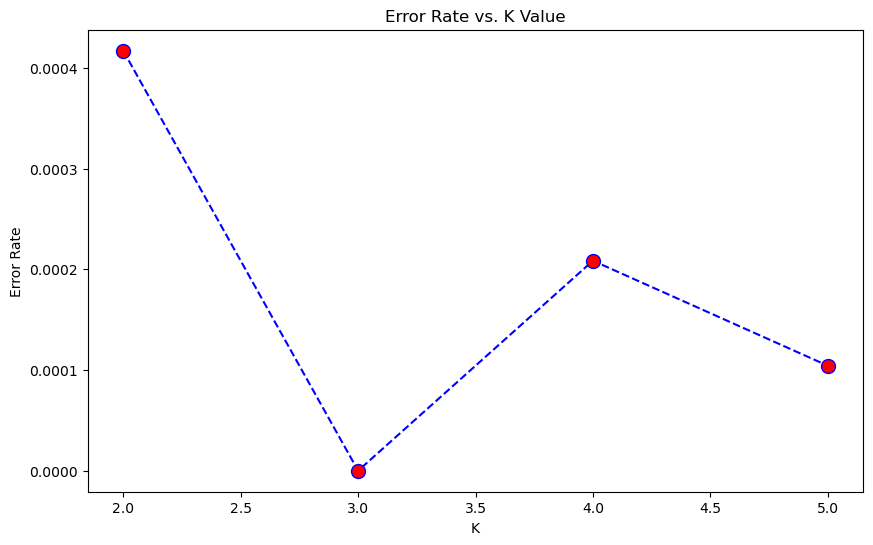

In [34]:
k_knn, k_list = entrenamiento(x_train, y_train,5)
print('best_k_value:',k_knn)
y_pred_val = predict_classification(x_val, y_val,k_knn)
accuracy, precision, sensitividad, f1 = metricas(y_pred_val,np.array(y_val))
print('Exactitud Validación:',accuracy)
print('Precisión Validación:',precision)
print('Sensitividad Validación:',sensitividad)
print('F1 Score Validación:',f1)

In [36]:
y_pred_test = predict_classification(x_test, y_test,k_knn)
accuracy, precision, sensitividad, f1 = metricas(y_pred_test,np.array(y_test))
print('Exactitud Prueba:',accuracy)
print('Precisión Prueba:',precision)
print('Sensitividad Prueba:',sensitividad)
print('F1 Score Prueba:',f1)

Exactitud Prueba: 0.9996873045653534
Precisión Prueba: 1.0
Sensitividad Prueba: 0.9963235294117647
F1 Score Prueba: 0.998158379373849
